# Data Preprocessing

Import data from the Wikipedia CSV dataset, shuffle, and remove the undesirable sentences (those which are labelled to be ungrammatical).

In [1]:
import pandas as pd
import ast

df = pd.read_csv('wikidownload.csv')

#get the text and embedding columns. Drop the rest
df = df[['text', 'embedding']]
import pandas as pd
import numpy as np

# define a function to convert string to list
def str_to_list(s):
    s = s.strip('[]')
    s_list = s.split()
    return [np.float64(i) for i in s_list]

df['embedding'] = df['embedding'].apply(str_to_list)
#rename embedding to "sbert_embedding"
df.rename(columns = {'embedding':'sbert_embedding'}, inplace = True)
df.head(10)

,text,sbert_embedding
0,"Gokarna means ""Cow's Ear"". It is so named due ...","[0.0272934251, 0.0237510726, -0.122941047, 0.0..."
1,"In 2000, installing a restaurant in the operat...","[-0.0138310865, 0.00647901045, 0.0437845029, -..."
2,After the brief and unsuccessful attempt at tr...,"[-0.0466405712, -0.0168740209, -0.0610199459, ..."
3,A Neanderthal archaeological site exists near ...,"[0.032720454, 0.107979089, -0.0263550337, 0.04..."
4,"The body is flat, long and quite large. The ba...","[0.0276898518, -0.0301963855, -0.031537801, 0...."
5,"Flores was born on August 12, 1900, in Hagåtña...","[-0.00281648058, 0.0241362024, 0.0105003398, 0..."
6,"Sulien is closely associated with the ""clas"" c...","[-0.0457646623, 0.0897284225, -0.0727756247, -..."
7,"In the nineteenth century ""La Meuse"" had a pro...","[0.03890457, -0.0383631587, -0.0605200492, 0.0..."
8,Silvera emigrated to Canada at the age of 12 w...,"[-0.0253946185, -0.00376774324, 0.0203974582, ..."
9,Forrester was born in Edinburgh in 1933. He wa...,"[-0.0356001258, -0.0455846936, -0.00654347194,..."


# Embeddings Generation – MPNet

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [3]:
df['mpnet_embedding'] = df['text'].apply(lambda x: model.encode(x))
df.to_csv('CompositeEmbeddings.csv', index=False)
df.head(10)

,text,sbert_embedding,mpnet_embedding
0,"Gokarna means ""Cow's Ear"". It is so named due ...","[0.0272934251, 0.0237510726, -0.122941047, 0.0...","[0.03181411, -0.08225417, -0.016482888, 0.0103..."
1,"In 2000, installing a restaurant in the operat...","[-0.0138310865, 0.00647901045, 0.0437845029, -...","[0.0562386, 0.07769398, 0.020221202, 0.0021364..."
2,After the brief and unsuccessful attempt at tr...,"[-0.0466405712, -0.0168740209, -0.0610199459, ...","[0.0042777313, 0.06688904, 0.003632529, -0.046..."
3,A Neanderthal archaeological site exists near ...,"[0.032720454, 0.107979089, -0.0263550337, 0.04...","[-0.03976745, -0.0017838568, -0.024358992, 0.0..."
4,"The body is flat, long and quite large. The ba...","[0.0276898518, -0.0301963855, -0.031537801, 0....","[0.040912174, -0.045827888, 0.0007575653, -0.0..."
5,"Flores was born on August 12, 1900, in Hagåtña...","[-0.00281648058, 0.0241362024, 0.0105003398, 0...","[-0.008473353, 0.069827504, -0.039913405, -0.0..."
6,"Sulien is closely associated with the ""clas"" c...","[-0.0457646623, 0.0897284225, -0.0727756247, -...","[-0.047548838, -0.022467254, 0.00824519, 0.049..."
7,"In the nineteenth century ""La Meuse"" had a pro...","[0.03890457, -0.0383631587, -0.0605200492, 0.0...","[-0.053356424, 0.064742304, 0.0023665472, 0.03..."
8,Silvera emigrated to Canada at the age of 12 w...,"[-0.0253946185, -0.00376774324, 0.0203974582, ...","[-0.011510727, 0.03833006, 0.0058826995, 0.015..."
9,Forrester was born in Edinburgh in 1933. He wa...,"[-0.0356001258, -0.0455846936, -0.00654347194,...","[0.010128417, -0.009974483, -0.01848533, 0.016..."


# Optional PCA Visualization

Can help to verify diversity of dataset. If a single principle axis explains most variance, embeddings model probably very rudimentary or dataset is probably too biased. In this case, used as a sanity check.

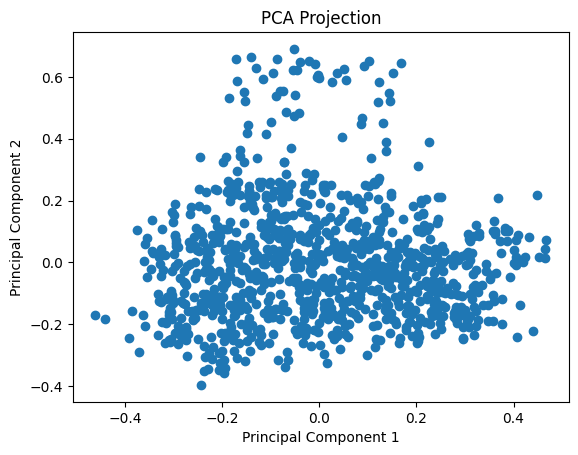

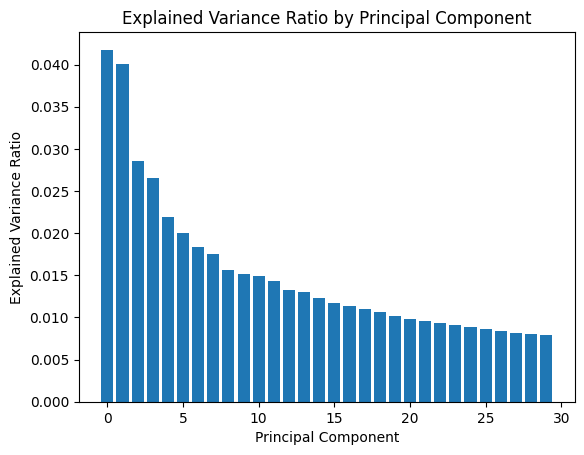

In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings=df['mpnet_embedding'].to_numpy()
embeddings = np.array([np.array(x) for x in embeddings])
data = embeddings

# Create an instance of PCA with 2 components
pca = PCA(n_components=30)

# Fit the data and transform it to the 2D space
transformed_data = pca.fit_transform(data)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Save OS Embeddings to Disk

In [42]:
np.save('OSembeddings.npy', embeddings)